##IMDB dataset: 

A set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

num_words=10000 means you’ll only keep the top 10,000 most fre-
quently occurring words in the training data. Rare words will be discarded. This allows
you to work with vector data of manageable size.

The variables train_data and test_data are lists of reviews; each review is a list of
word indices (encoding a sequence of words). train_labels and test_labels are
lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [0]:
train_data[0]

In [0]:
train_labels[0]

1

no word index will exceed 10,000:

In [0]:
max([max(sequence) for sequence in train_data])

In [0]:
#word_index is a dictionary mapping, words to an integer index
word_index = imdb.get_word_index() 
# Reverses it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i, '?') for i in train_data[0]])

In [0]:
print(decoded_review)

In [0]:
reverse_word_index.get(2)

# Encoding the integer sequences into a binary matrix

In [0]:
import numpy as np
#Creates an all-zero matrix of shape (len(sequences),dimension)
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. #Sets specific indices of results[i] to 1s
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
x_train[0]

In [0]:
# vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
# The model definition
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
from keras import losses
from keras import metrics
from keras import optimizers
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train,epochs=20,batch_size=512,
                    validation_data=(x_val, y_val))

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

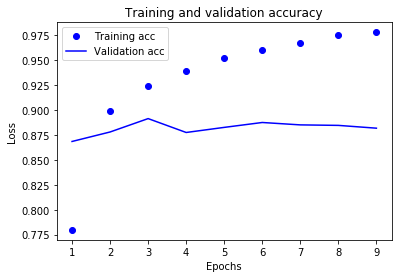

In [0]:
plt.clf() #Clears the figure
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The network begins to overfit after nine epochs. Let’s train a new network from
scratch for nine epochs and then evaluate it on the test set.

In [0]:
print(max(y_train))

1.0
